2) Uma construtora está avaliando novas técnicas construtivas para a condução de suas obras.
A  ideia  seria  de  usar  blocos  de  concreto  armado  pré-moldados  ao  invés  de  trabalhar  com  a
moldagem de concreto na obra. Teoricamente, esta estratégia poderia ser benéfica, pois o bloco
pode ser mais rentável que o concreto.  
Para avaliar essas estratégias, ela então decide coletar dados das suas últimas 18 obras em uma
região e ver se a utilização de mais blocos de fato gerou uma melhoria. De sua análise financeira,
eles buscaram que o custo com o metro cúbico de concreto (para a formulação e moldagem) é
de R$ 240,00 por m³, enquanto o preço do milheiro (mil unidades) de bloco é de R$ 560,00.  
Os dados estão na planilha Green_Belt_FM2S_Lista_Exercícios_03_e_04, na aba
02.Construtora.

| **Coluna da Worksheet** | **Descrição** |
|--------------------------|---------------|
| **Concreto**             | Valor em m³ de cimento utilizado na construção. |
| **Blocos Armados**       | Centenas de blocos de concreto armado pré-moldados utilizados na construção. |

---

**Responda:**

**a)** Aumentar o número de blocos reduz a quantidade de cimento utilizada?

**b)** Aumentar o número de blocos, reduz o custo total da obra?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://github.com/moises-rb/Analise_Dados/blob/main/Green_Belt/3-Analyse/Exercicios/Lista_3/base_dados/%5BFM2S%5D%20Lista_Exerc%C3%ADcios_%203%20e%204.xlsx?raw=True'

In [3]:
pd.ExcelFile(url).sheet_names

['1.Teste_Medicamento', '2.Construtora', '3.Condicionamento_Físico']

In [4]:
dados_construtora = pd.read_excel(url, sheet_name=1) #pd.read_excel(url, sheet_name='1.Teste_Medicamento')

In [5]:
# Visualização inicial dos dados
print(dados_construtora.head())
print(dados_construtora.info())
print(dados_construtora.describe())

   Quantidade de Concreto (m³)  Quantidade de blocos (centenas)
0                           82                               71
1                           91                               64
2                          100                               43
3                           68                               67
4                           87                               56
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   Quantidade de Concreto (m³)      18 non-null     int64
 1   Quantidade de blocos (centenas)  18 non-null     int64
dtypes: int64(2)
memory usage: 420.0 bytes
None
       Quantidade de Concreto (m³)  Quantidade de blocos (centenas)
count                    18.000000                        18.000000
mean                     85.000000                        61.555556
std                   

a) Aumentar o número de blocos reduz a quantidade de cimento utilizada?
Método: Correlação e Gráfico de Dispersão

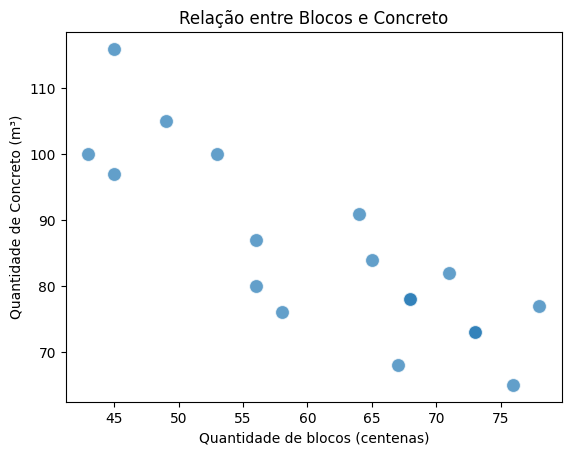

Correlação: -0.84


In [7]:
# Gráfico de dispersão
sns.scatterplot(
    x='Quantidade de blocos (centenas)',
    y='Quantidade de Concreto (m³)',
    data=dados_construtora,
    alpha=0.7,
    s=100
)
plt.title("Relação entre Blocos e Concreto")
plt.show()

# Correlação (Pearson)
correlacao = dados_construtora['Quantidade de blocos (centenas)'].corr(dados_construtora['Quantidade de Concreto (m³)'])
print(f"Correlação: {correlacao:.2f}")

Transformação dos dados:

Vamos calcular o custo total para cada obra:

In [6]:
dados_construtora['Custo Concreto'] = dados_construtora['Quantidade de Concreto (m³)'] * 240
dados_construtora['Custo Blocos'] = dados_construtora['Quantidade de blocos (centenas)'] * 56  # (560/1000 * 100)
dados_construtora['Custo Total'] = dados_construtora['Custo Concreto'] + dados_construtora['Custo Blocos']

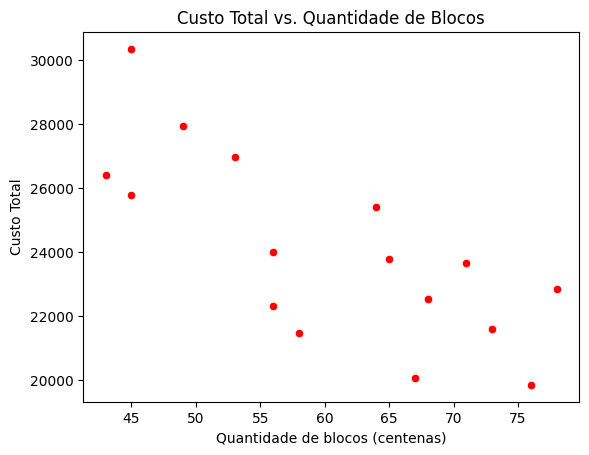

Inclinação (slope): -190.40
R²: 0.58


In [9]:
from scipy.stats import linregress

# Cálculo do custo total (como mostrado acima)
dados_construtora['Custo Total'] = dados_construtora['Quantidade de Concreto (m³)']*240 + dados_construtora['Quantidade de blocos (centenas)']*56

# Gráfico de dispersão (Custo Total vs. Blocos)
sns.scatterplot(
    x='Quantidade de blocos (centenas)',
    y='Custo Total',
    data=dados_construtora,
    color='red'
)
plt.title("Custo Total vs. Quantidade de Blocos")
plt.show()

# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(
    dados_construtora['Quantidade de blocos (centenas)'],
    dados_construtora['Custo Total']
)
print(f"Inclinação (slope): {slope:.2f}")  # Se negativo, custo cai com mais blocos.
print(f"R²: {r_value**2:.2f}")  # Qualidade do ajuste.

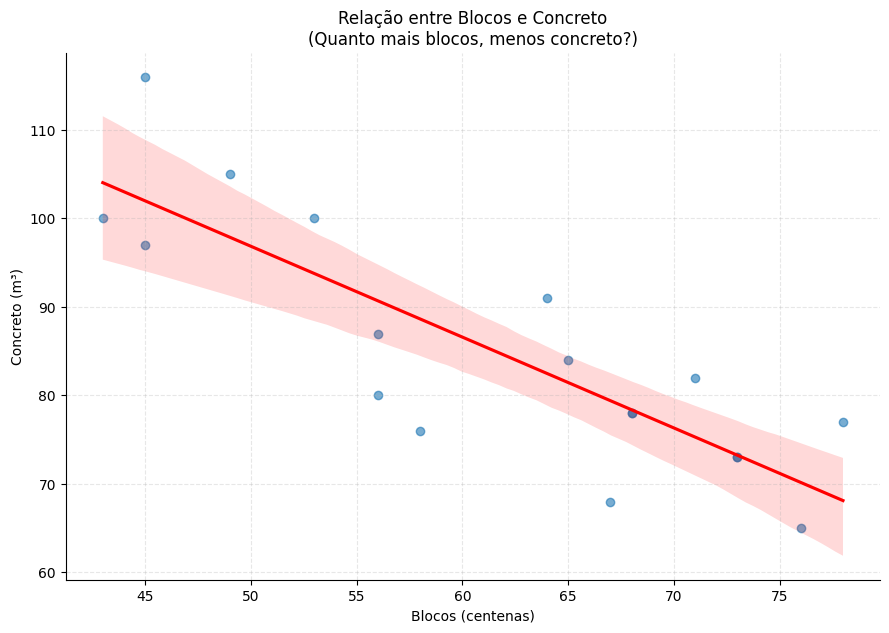

In [11]:
# Configuração do gráfico
sns.lmplot(
    x='Quantidade de blocos (centenas)',
    y='Quantidade de Concreto (m³)',
    data=dados_construtora,
    height=6,
    aspect=1.5,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.6}
)
plt.title("Relação entre Blocos e Concreto\n(Quanto mais blocos, menos concreto?)")
plt.xlabel("Blocos (centenas)")
plt.ylabel("Concreto (m³)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

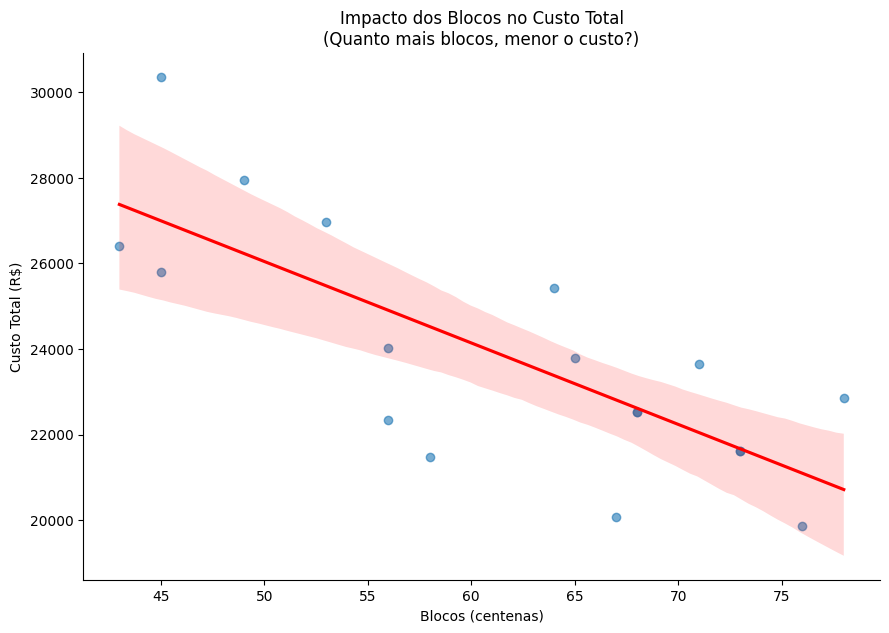

In [13]:
# Calcular custo total
dados_construtora['Custo Total (R$)'] = (dados_construtora['Quantidade de Concreto (m³)'] * 240) + (dados_construtora['Quantidade de blocos (centenas)'] * 56)

# Gráfico
sns.lmplot(
    x='Quantidade de blocos (centenas)',
    y='Custo Total (R$)',
    data=dados_construtora,
    height=6,
    aspect=1.5,
    line_kws={'color': 'red'},
    scatter_kws={'alpha': 0.6}
)
plt.title("Impacto dos Blocos no Custo Total\n(Quanto mais blocos, menor o custo?)")
plt.xlabel("Blocos (centenas)")
plt.ylabel("Custo Total (R$)")
plt.show()

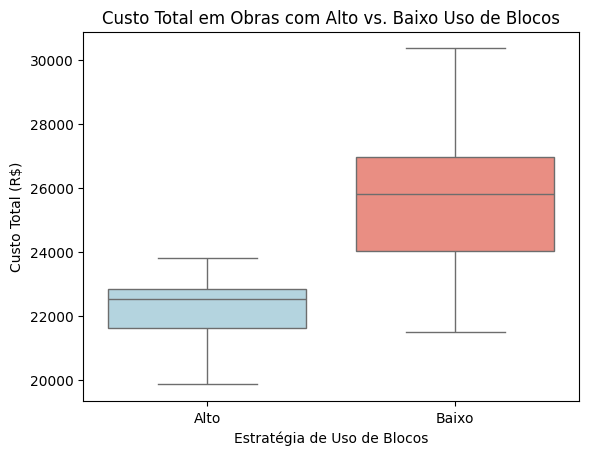

In [15]:
# Criar categorias (ex.: acima e abaixo da mediana de blocos)
dados_construtora['Uso de Blocos'] = ['Alto' if x > dados_construtora['Quantidade de blocos (centenas)'].median() else 'Baixo' for x in dados_construtora['Quantidade de blocos (centenas)']]

# Boxplot
sns.boxplot(
    x='Uso de Blocos',
    y='Custo Total (R$)',
    data=dados_construtora,
    palette=['lightblue', 'salmon'],
    hue='Uso de Blocos'
)
plt.title("Custo Total em Obras com Alto vs. Baixo Uso de Blocos")
plt.xlabel("Estratégia de Uso de Blocos")
plt.ylabel("Custo Total (R$)")
plt.show()

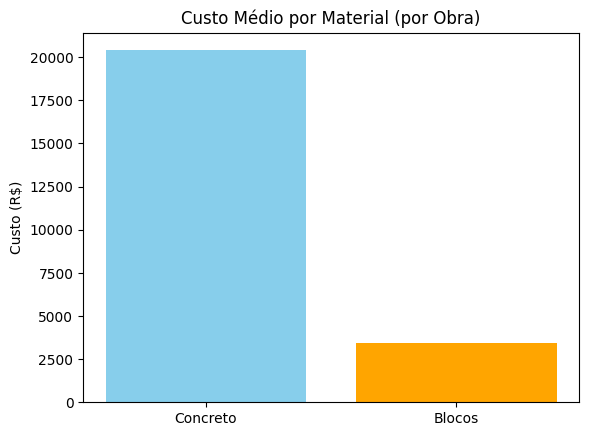

In [16]:
# Calcular custos médios
custo_medio_concreto = dados_construtora['Quantidade de Concreto (m³)'].mean() * 240
custo_medio_blocos = dados_construtora['Quantidade de blocos (centenas)'].mean() * 56

# Gráfico de barras
materiais = ['Concreto', 'Blocos']
custos = [custo_medio_concreto, custo_medio_blocos]
plt.bar(materiais, custos, color=['skyblue', 'orange'])
plt.title("Custo Médio por Material (por Obra)")
plt.ylabel("Custo (R$)")
plt.show()